#  Principal Component Analysis 主成分分析

Principal Component Analysis 主成分分析是一种非监督学习方法(unsupervised learning), 处理的数据不包括类别信息(label/target).

主成分分析主要用于降维(dimension reduction), 也常用于数据可视化(visualization), 或者去噪(noise filtering), 特征提取(feature extraction)等等.

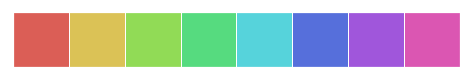

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.palplot(sns.color_palette("hls", 8))

## 降维演示

将二维数据降维为一维数据.
考虑如下200个数据点:

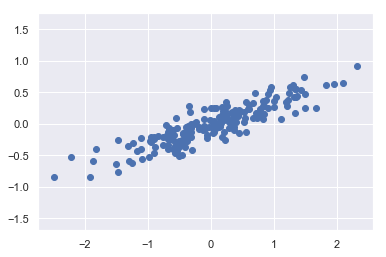

In [16]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

肉眼可见数据的 x 与 y 是线性相关的, PCA试图找到数据的主坐标轴 (*principal axes*), 将数据从原来的形式转换为使用主坐标轴来表达, 使用 Scikit-Learn's ``PCA`` 类, 我们可以如下计算:

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA找到了数据的坐标轴( "components" )以及可解释的方差( "explained variance"):

In [18]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [19]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


我们使用可视化的方式来解释 “components” 和 “explained variance” 的意义. “compontents” 为两个向量的方向, “explained variance” 为向量的长度的平方:

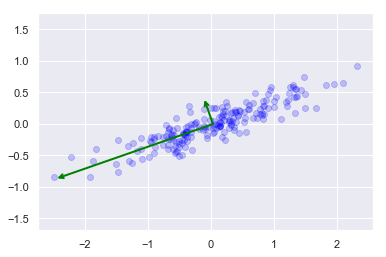

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='green')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color='blue')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

两个向量分别代表了数据的两个主坐标轴 (*principal axes*), 向量的长度代表了此坐标轴对于描述数据分布的”重要性“, 长度带表了数据投影到这个轴上面以后的方差. 

将每一个数据点投影到主坐标轴 (*principal axes*)以后得到的值为数据的主成分( "principal components" ). 如果我们将以下左图的数据的主成分画出来, 为以下右图所示: 

![](figures/05.09-PCA-rotation.png)

将数据从原来的轴转换到新的轴的过程是一个仿射变换(*affine transformation*), 意味着这个转换是由平移, 旋转, 和均匀缩放完成的. 

PCA在机器学习和数据可视化上面的用途非常广泛.

### 使用 PCA 进行降维

使用PCA降维就是将比较不重要的主成分删除的操作, 保留下来的低维度的数据最大程度的保留了原来数据的方差. 例如:

In [21]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


将原来的2维数据降维一维, 然后我们可以把一维的数据反转为二维, 察看其效果:

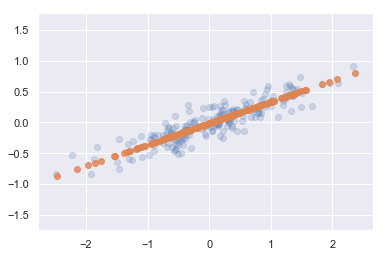

In [22]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

浅蓝色的数据点为原来的数据, 橙色的点为降维后又转为原来2维的数据点. 我们看到所谓 PCA 降维就是将不重要的坐标轴 (principle axis)上面的信息删除, 只保留具有较大的方差的维度上面的信息. 

被删除的信息对应的方差表达了降维造成的信息丢失.

被降维的数据在某种程度上而言已经包含了原来数据点最重要的关系信息: 尽管在2维降维1维的情况下, 50%的信息被丢弃了, 数据点之间的主要关系被保留了. 

### PCA 可视化: 手写数字

将二维数据降维一维数据所带来的便利并不明显, 但是如果是高纬数据, 这个优势就显露出来了. 看看手写数字图像降维的例子.

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

手写数字是 8×8 像素的图像, 将 8 行的数据串起来就得到了一个 64 维的数据点. 
为了得到不同数据点之间的关系, 我们可以对原来的数据降维为 2 维, 然后进行可视化:

In [24]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


将数据最重要的 2 维可视化:

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


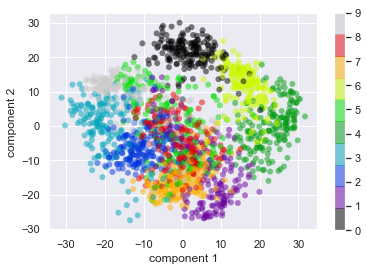

In [25]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

回归主成分的意义: 原来的数据是64维的数据点, 被投影到方差最大的两个维度上. 本质是在64维空间里面拉伸, 旋转数据, 找到一个最佳的方向在 2 维上面去看这些数据的关系.

### 主成分的意义?

可以通过线性代数中的基向量的线性组合来理解. 例如, 训练数据中的每一幅图都会又 64 个数据点构成的 $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

就是说图像由基像素的线性组合构成, 即:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

一种基像素的方式可以是如下方式:


![](figures/05.09-digits-pixel-components.png)

第一行对应的是像素, 第二行对应的是像素的强度, 第一行和第二行的对应值相乘, 然后再相加就得到了一个图像. 我们只使用了 8 个基像素, 所以只重构了图像的一小部分. 如果我们继续这个过程, 就可以重构原来的图像. 

但是基像素的表达并不是唯一的, 我们可以想象其它的表达方式, 例如:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA 可以被想象成挑选最佳基向量的过程, 使得只需要比较少量的基向量就可以用于重构原来的数据. 
主成分是原来数据的低维表达, 其实只是最佳基向量的对应系数值. 如下图显示了前 8 个 PCA 基向量于对应的系数, 他们和平均图一起可以大致还原原来的图像:

![](figures/05.09-digits-pca-components.png)


与基像素不同, PCA 基向量只需少量的 8 个主成分就可以重构原来的主要特征. 

### 如何选择最佳的主成分数量

PCA 重要的一个部分是如何确定最佳的主成分的数量,  用于重构原来的数据. 

一个方法是查看累积 (*explained variance ratio* )和主成分数量的关系曲线:

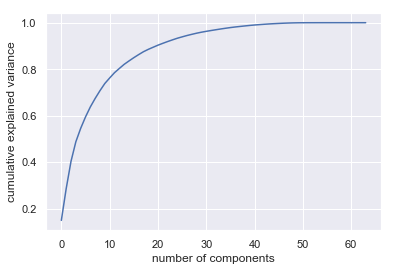

In [26]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

曲线表达了前 $N$ 个维度描述了 64 个维度的方差的百分比. 例如, 前 10 个主成分表达了 75% 的方差, 前 50 个主成分描述了几乎 100% 的方差们前 20 个主成分保留了 90% 的方差.

## PCA 用于去燥

如果一个主成分的方差远大于噪声的方差, 就应该不太受到噪声影响. 如果仅仅使用比较重要的主成分来重构原来的数据, 相当于保留了重要的信号, 而丢弃了噪声. 

我们察看手写数字图像去燥的过程, 原始的数字图像如下:

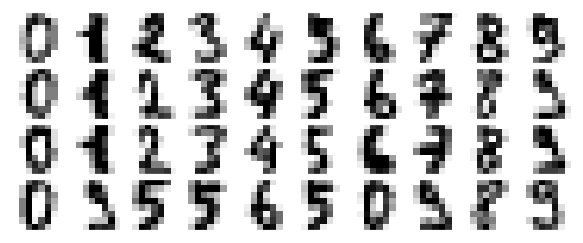

In [27]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

添加随机噪声, 图像如下:

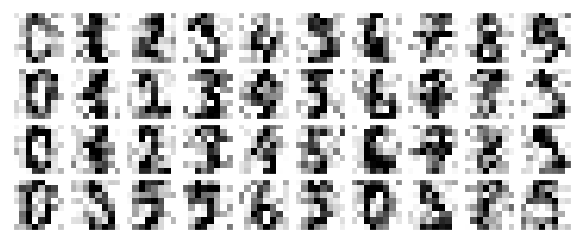

In [28]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

使用如上带噪声的数据进行 PCA 降维和重构, 保留 50% 原来的方差: 


In [29]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

前 12 个主成分保留了 50% 的方差. 计算主成分, 并且重构图像:

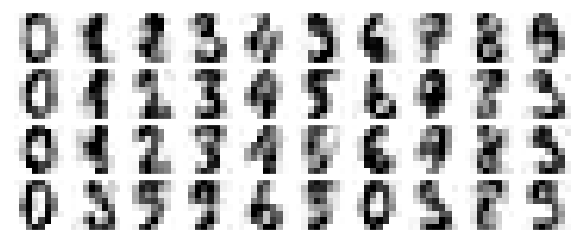

In [30]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

这个例子也显示处 PCA 可以用于特征提取, 在训练机器学习模型的之前, 对数据进行降维, 可以去除不重要的特征. 

## 实例: 特征脸 Eigenfaces

In [31]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


我们尝试选择 150 个主成分:

In [35]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

可视化比较重要的主成分(也被称为 "eigenvectors", 特征脸 "eigenfaces"):

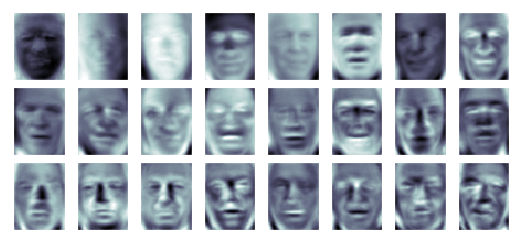

In [36]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

前面的特征脸对应了光照, 后面的特征量对应了某些人脸特征, 例如研究, 鼻子, 嘴唇等等. 
我们看看前多少个特征对应了多少的重要性: 

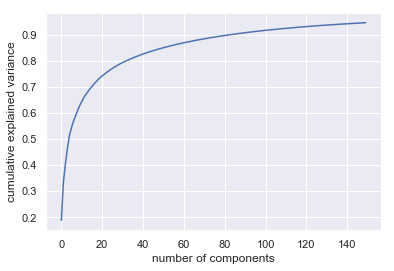

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

前 150 个主成分包含了 90% 的方差, 我们可以比较使用前 150 个主成分重构的图像和原来图像的区别:

In [39]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

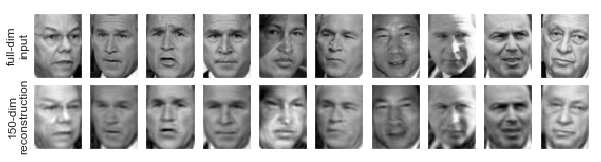

In [40]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

第一行对应了原来的图像, 第二行对应了150个主成分重构的图像. 尽管150个主成分相当于降维到原来的二十分之一(原来的维度为3000左右), 图像的信息却比较完整的保留了. 